In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X = pd.DataFrame(cancer['data'])
X.columns = cancer['feature_names']
X['target'] = cancer['target']
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
print(cancer.target_names)
cancer.target

['malignant' 'benign']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
df0 = X[X.target == 0].head(50)
df0

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [7]:
df1 = X[X.target == 1].head(50)
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409,1
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301,1
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,0.05718,...,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917,1
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563,1
51,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025,1
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.019720,0.013490,0.1868,0.06110,...,21.33,83.67,527.2,0.11440,0.08906,0.092030,0.06296,0.2785,0.07408,1


In [8]:
X['class'] = X.target.apply(lambda x: cancer.target_names[x])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [9]:
#Mean Radius vs Mean Texture
import matplotlib.pyplot as plt
%matplotlib inline


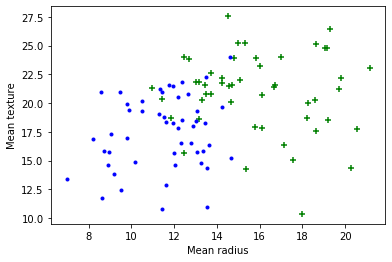

In [11]:
plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.scatter(df0['mean radius'], df0['mean texture'], color="green", marker= '+')
plt.scatter(df1['mean radius'], df1['mean texture'], color="blue", marker= '.')

In [12]:
#Defining our data..dropping 2 columns which we have added
X = X.drop(['target', 'class'], axis = 'columns')
#Defining target variables
Y = cancer['target']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.33, random_state=42)
#Defining classifier
from sklearn.svm import SVC
cla = SVC()
#Training of the model
cla.fit(X_train, Y_train)
#Testing of our trained model
pred = cla.predict(X_test)
pred

C:\new\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
score = cla.score(X_test, Y_test)
print(score)

#Accuracy
print("accuracy", metrics.accuracy_score(Y_test, pred))

#Importing confusion matrix
from sklearn.metrics import confusion_matrix
cm = np.array(confusion_matrix(Y_test, pred))
cm

0.6436170212765957
accuracy 0.6436170212765957


array([[  0,  67],
       [  0, 121]], dtype=int64)

TUNE PARAMETERS
1. REGULARIZATION

In [ ]:
model_C = SVC(C=1)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

In [16]:
model_C = SVC(C=10)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

C:\new\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6436170212765957

2. GAMMA

In [17]:
model_g = SVC(gamma='scale')
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

0.9521276595744681

3. KERNEL

In [18]:
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
model_linear_kernel.score(X_test, Y_test)

0.9574468085106383